# Práctica 5

- Martínez Ostoa Néstor 
- Visualización de la Información - 0605
- Ciencia de Datos, IIMAS, UNAM
- Marzo 2021

## 1. Filtrado de datos

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, kstest, shapiro
from statsmodels.stats.diagnostic import lilliefors

In [4]:
titanic_df = pd.read_csv('dataset/titanic3.csv')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
print(titanic_df.shape)
print(titanic_df.info())

(1309, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


### ¿Cuántos cuerpos fueron encontrados y de estos, cuántos eran hombres mayores de 40 años?

In [17]:
t_df = titanic_df[titanic_df.survived == 1]
num_survivors = t_df.shape[0]
num_male_40 = t_df[(t_df.sex == 'male') & (t_df.age > 40)].shape[0]
print(f'Cuerpos encontrados: {num_survivors}\nHombres mayores de 40: {num_male_40}')

Cuerpos encontrados: 500
Hombres mayores de 40: 25


### ¿Cuántas mujeres desaparecidas con edades entre 15 y 30 años?

In [26]:
t_df = titanic_df[titanic_df.survived == 0]
num_female_15_30 = t_df[(t_df.sex == 'female') & (t_df.age >= 15) & (t_df.age <= 30)].shape[0]
print(f'Mujeres desaparecidas entre 15 y 30 años: {num_female_15_30}')

Mujeres desaparecidas entre 15 y 30 años: 50


### ¿Cuántos hombres mayores de 20 años sobrevivieron?

In [27]:
t_df = titanic_df[titanic_df.survived == 1]
num_male_20 = t_df[(t_df.sex == 'male') & (t_df.age > 20)].shape[0]
print(f'Hombres sobrevivientes mayores a 20 años: {num_male_20}')

Hombres sobrevivientes mayores a 20 años: 96


### ¿Cuánntas mujeres menores de 25 años sobrevivieron?

In [28]:
t_df = titanic_df[titanic_df.survived == 1]
num_female_25 = t_df[(t_df.sex == 'female') & (t_df.age < 25)].shape[0]
print(f'Mujeres sobrevivientes menores a 25 años: {num_female_25}')

Mujeres sobrevivientes menores a 25 años: 124


## Genera una copia del dataset y rellene los datos faltantes

In [30]:
df_copy = titanic_df.copy()

In [32]:
df_copy.isna().any()

pclass       False
survived     False
name         False
sex          False
age           True
sibsp        False
parch        False
ticket       False
fare          True
cabin         True
embarked      True
boat          True
body          True
home.dest     True
dtype: bool

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [40]:
df_copy[df_copy.columns[df_copy.isna().any()]]

,age,fare,cabin,embarked,boat,body,home.dest
0,29.0000,211.3375,B5,S,2,NaN,"St Louis, MO"
1,0.9167,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2.0000,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,30.0000,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,25.0000,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...
1304,14.5000,14.4542,NaN,C,NaN,328.0,NaN
1305,NaN,14.4542,NaN,C,NaN,NaN,NaN
1306,26.5000,7.2250,NaN,C,NaN,304.0,NaN
1307,27.0000,7.2250,NaN,C,NaN,NaN,NaN


In [54]:
df_copy.age = df_copy.age.fillna(int(np.mean(df_copy.age)))
df_copy.fare = df_copy.fare.fillna(int(np.mean(df_copy.fare)))
df_copy.cabin = df_copy.cabin.fillna('Desconocido')
df_copy.embarked = df_copy.embarked.fillna('Desconocido')
df_copy.boat = df_copy.boat.fillna(0)
df_copy.body = df_copy.body.fillna(int(np.mean(df_copy.body)))
df_copy['home.dest'] = df_copy['home.dest'].fillna('Desconocido')

In [55]:
df_copy[df_copy.columns[df_copy.isna().any()]]

""
0
1
2
3
4
...
1304
1305
1306
1307


In [61]:
df_copy.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,160.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,160.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,160.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,160.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,160.0,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,160.0,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,0,160.0,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,160.0,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,Desconocido,C,0,22.0,"Montevideo, Uruguay"


In [60]:
df_copy.isna().any()

pclass       False
survived     False
name         False
sex          False
age          False
sibsp        False
parch        False
ticket       False
fare         False
cabin        False
embarked     False
boat         False
body         False
home.dest    False
dtype: bool

## De los campos _age_ y _fare_ agregue columnas al dataset que contenga los valores normalizados

In [106]:
age = round(df_copy.age)
fare = df_copy.fare

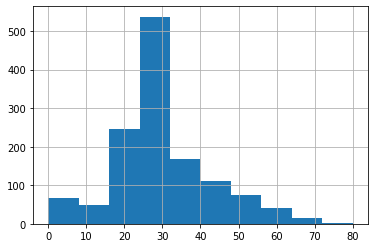

In [107]:
age.hist()
plt.show()

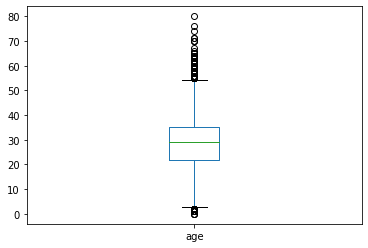

In [108]:
age.plot(kind='box')
plt.show()

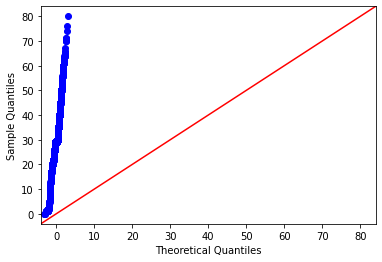

In [109]:
sm.qqplot(age, line='45')
plt.show()

In [116]:
normal_tests = [kstest, lilliefors, shapiro]
for f in normal_tests:
    if f is kstest: print(f, f(age, 'norm'))
    else: print(f, f(age))

<function kstest at 0x11f1b0040> KstestResult(statistic=0.9726760759943439, pvalue=0.0)
<function kstest_fit at 0x1287f5b80> (0.1582731204623754, 0.0009999999999998899)
<function shapiro at 0x11f1a9f70> ShapiroResult(statistic=0.9543531537055969, pvalue=8.974162598709638e-20)


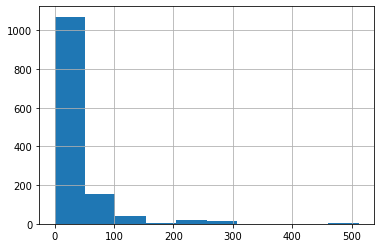

In [82]:
fare.hist()
plt.show()

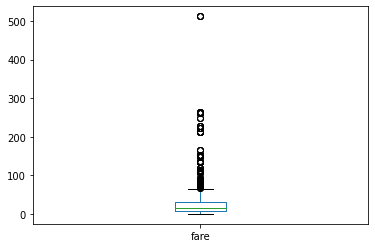

In [84]:
fare.plot(kind='box')
plt.show()

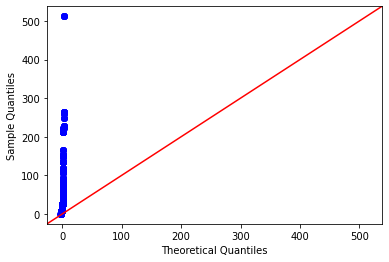

In [89]:
sm.qqplot(fare, line='45')
plt.show()

In [117]:
normal_tests = [kstest, lilliefors, shapiro]
for f in normal_tests:
    if f is kstest: print(f, f(fare, 'norm'))
    else: print(f, f(age))

<function kstest at 0x11f1b0040> KstestResult(statistic=0.9862528881668651, pvalue=0.0)
<function kstest_fit at 0x1287f5b80> (0.1582731204623754, 0.0009999999999998899)
<function shapiro at 0x11f1a9f70> ShapiroResult(statistic=0.9543531537055969, pvalue=8.974162598709638e-20)


Podemos concluir que ningua de las dos variables sigue una distribución normal por lo que podemos utilizar la siguiente normalización: $$\frac{x_i - x_{min}}{x_{max} - x_{min}}$$

In [120]:
def normalize(values):
    min_ = min(values)
    max_ = max(values)
    return (values - min_) / (max_ - min_)

In [124]:
df_copy['age_norm'] = normalize(age)
df_copy['fare_norm'] = normalize(fare)
df_copy.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_norm,fare_norm
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,160.0,"St Louis, MO",0.3625,0.412503
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,160.0,"Montreal, PQ / Chesterville, ON",0.0125,0.295806
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,160.0,"Montreal, PQ / Chesterville, ON",0.0250,0.295806
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON",0.3750,0.295806
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,160.0,"Montreal, PQ / Chesterville, ON",0.3125,0.295806
